In [82]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [17]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [23]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [24]:
# Define the original CNN model
original_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [25]:
# Compile the original model
original_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
# Summary of the original model
original_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [27]:
# Train the original model
original_history = original_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4078 - accuracy: 0.4964 - val_loss: 1.1669 - val_accuracy: 0.5917
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0588 - accuracy: 0.6286 - val_loss: 0.9943 - val_accuracy: 0.6593
Epoch 3/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.9204 - accuracy: 0.6788 - val_loss: 0.9497 - val_accuracy: 0.6682
Epoch 4/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.8185 - accuracy: 0.7163 - val_loss: 0.9441 - val_accuracy: 0.6822
Epoch 5/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.7376 - accuracy: 0.7418 - val_loss: 0.9224 - val_accuracy: 0.6844
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6596 - accuracy: 0.7702 - val_loss: 0.9646 - val_accuracy: 0.6780
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.5858 - accuracy: 0.7944 - val_loss: 0.9419 -

In [28]:
# Save the original model's architecture and weights
original_model.save('original_cnn_model.h5')

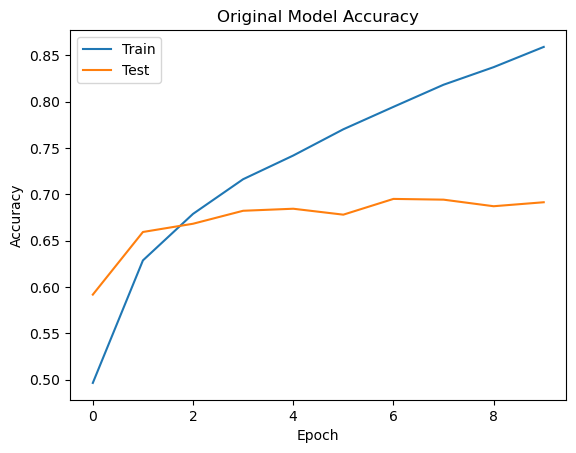

In [29]:
# Visualize Model Training History for the original model
plt.plot(original_history.history['accuracy'])
plt.plot(original_history.history['val_accuracy'])
plt.title('Original Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

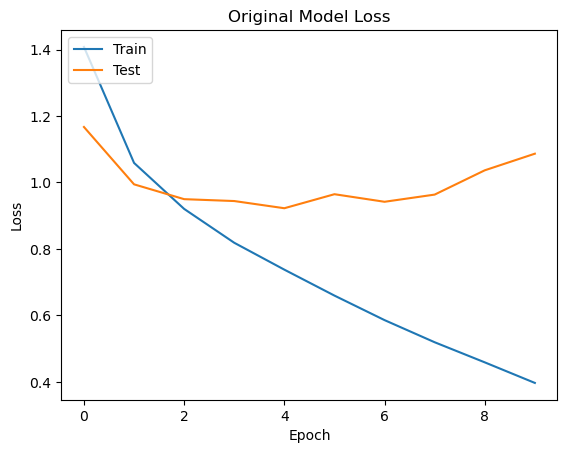

In [30]:
# Summarize history for loss for the original model
plt.plot(original_history.history['loss'])
plt.plot(original_history.history['val_loss'])
plt.title('Original Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:
# Evaluate the original model on the test data
original_test_loss, original_test_accuracy = original_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.0866 - accuracy: 0.6914


In [32]:
print("Original Model Test Loss:", original_test_loss)
print("Original Model Test Accuracy:", original_test_accuracy)

Original Model Test Loss: 1.0865659713745117
Original Model Test Accuracy: 0.6913999915122986


In [33]:
# Make predictions using the original model
original_predictions = original_model.predict(test_images)

313/313 [==============================] - 2s 4ms/step


In [36]:
# Calculate confusion matrix and classification report for the original model
original_cm = confusion_matrix(test_labels, np.argmax(original_predictions, axis=1))
print("Confusion Matrix for the Original Model:")
print(original_cm)

Confusion Matrix for the Original Model:
[[663  34  81  31  37   9   9  22  80  34]
 [ 10 791  18  12   9   2  12   3  33 110]
 [ 35   2 649  59 132  47  31  28  11   6]
 [ 14   9  83 532 128 118  37  42  18  19]
 [ 13   1  61  49 764  26  18  59   8   1]
 [  8   1  75 218  85 510  15  65  11  12]
 [  2   6  47 101  98  25 691   9  11  10]
 [  9   3  33  36 120  46   7 732   5   9]
 [ 44  40  26  18  19   6   5  11 799  32]
 [ 19  74  13  16  18   9   3  30  35 783]]


In [37]:
original_cr = classification_report(test_labels, np.argmax(original_predictions, axis=1))
print("Classification Report for the Original Model:")
print(original_cr)

Classification Report for the Original Model:
              precision    recall  f1-score   support

           0       0.81      0.66      0.73      1000
           1       0.82      0.79      0.81      1000
           2       0.60      0.65      0.62      1000
           3       0.50      0.53      0.51      1000
           4       0.54      0.76      0.63      1000
           5       0.64      0.51      0.57      1000
           6       0.83      0.69      0.76      1000
           7       0.73      0.73      0.73      1000
           8       0.79      0.80      0.79      1000
           9       0.77      0.78      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [83]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [84]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [85]:
# Define the modified CNN model with an extra convolutional layer
modified_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Additional convolutional layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [86]:
# Compile the modified model
modified_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [87]:
# Summary of the modified model
modified_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 2, 2, 128)       

In [88]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [89]:
# Train the modified model
modified_history = modified_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 47s 29ms/step - loss: 1.4851 - accuracy: 0.4583 - val_loss: 1.2500 - val_accuracy: 0.5541
Epoch 2/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.1060 - accuracy: 0.6116 - val_loss: 1.1232 - val_accuracy: 0.6101
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9475 - accuracy: 0.6673 - val_loss: 0.9343 - val_accuracy: 0.6758
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8386 - accuracy: 0.7078 - val_loss: 0.8990 - val_accuracy: 0.6858
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7517 - accuracy: 0.7378 - val_loss: 0.8539 - val_accuracy: 0.7043
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6856 - accuracy: 0.7602 - val_loss: 0.8945 - val_accuracy: 0.6978
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.6253 - accuracy: 0.7815 - val_loss: 0.8576 -

In [90]:
# Save the modified model's architecture and weights
modified_model.save('modified_cnn_model.h5')

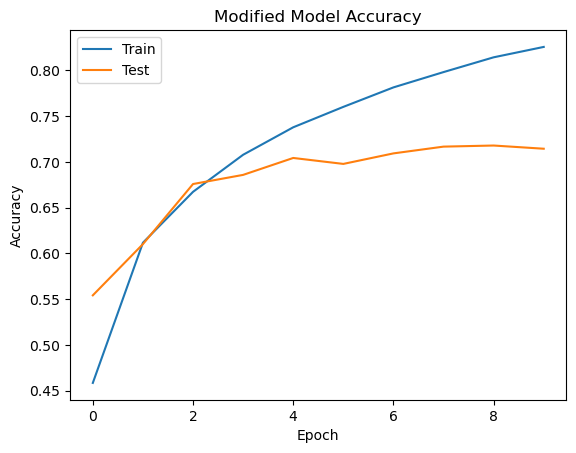

In [91]:
# Visualize Model Training History for the modified model
plt.plot(modified_history.history['accuracy'])
plt.plot(modified_history.history['val_accuracy'])
plt.title('Modified Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

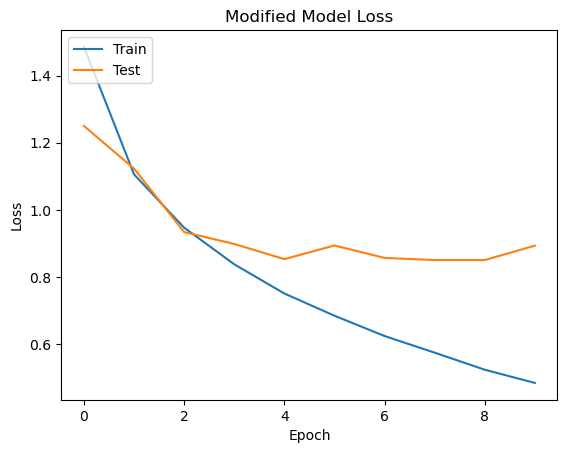

In [92]:
# Summarize history for loss for the modified model
plt.plot(modified_history.history['loss'])
plt.plot(modified_history.history['val_loss'])
plt.title('Modified Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [93]:
# Evaluate the modified model on the test data
modified_test_loss, modified_test_accuracy = modified_model.evaluate(test_images, test_labels)

print("Modified Model Test Loss:", modified_test_loss)
print("Modified Model Test Accuracy:", modified_test_accuracy)

313/313 [==============================] - 2s 8ms/step - loss: 0.8940 - accuracy: 0.7144
Modified Model Test Loss: 0.893974781036377
Modified Model Test Accuracy: 0.7143999934196472


In [94]:
# Make predictions using the modified model
modified_predictions = modified_model.predict(test_images)

313/313 [==============================] - 3s 8ms/step


In [95]:
# Calculate confusion matrix and classification report for the modified model
modified_cm = confusion_matrix(test_labels, np.argmax(modified_predictions, axis=1))
print("Confusion Matrix for the Modified Model:")
print(modified_cm)

Confusion Matrix for the Modified Model:
[[686  38  65  28  21   4  15  11  99  33]
 [  7 890   8   5   3   3  12   5  25  42]
 [ 47  12 613  76  54  57  74  44  19   4]
 [ 13  15  64 587  53 113  82  42  19  12]
 [ 17  13  82  65 582  39  95  87  11   9]
 [  6  11  54 220  27 560  43  70   6   3]
 [  3   5  44  58  20  13 837   9   9   2]
 [ 13  11  36  51  38  36  12 780   7  16]
 [ 38  25  10  22   2   4   7   6 868  18]
 [ 24 133  10  21   1   6  10  14  40 741]]


In [96]:
modified_cr = classification_report(test_labels, np.argmax(modified_predictions, axis=1))
print("Classification Report for the Modified Model:")
print(modified_cr)

Classification Report for the Modified Model:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1000
           1       0.77      0.89      0.83      1000
           2       0.62      0.61      0.62      1000
           3       0.52      0.59      0.55      1000
           4       0.73      0.58      0.65      1000
           5       0.67      0.56      0.61      1000
           6       0.71      0.84      0.77      1000
           7       0.73      0.78      0.75      1000
           8       0.79      0.87      0.83      1000
           9       0.84      0.74      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [97]:
# Compare the performance of the modified model with the original model
if modified_test_accuracy > original_test_accuracy:
    print("Modified model outperforms the original model.")
elif modified_test_accuracy < original_test_accuracy:
    print("Original model outperforms the modified model.")
else:
    print("Both models have the same test accuracy.")

Modified model outperforms the original model.
